In [1]:
%pylab inline

import matplotlib.pyplot as plt

import numpy as np

import matplotlib as mpl

import scipy.optimize as opt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from gibbs import BiddleFreeEn

In [3]:
bid = BiddleFreeEn()

In [4]:
## todo, the optimum value of x always seems to be greater than 0



presses = np.linspace(1,300,100)


rho = bid.rho(300,presses)

/home/aidan/my_gits/ts_eos/gibbs.py:269: RuntimeWarning: divide by zero encountered in true_divide
  return 1/self.vol(T, P)


In [5]:
V = bid.vol(300,presses).T


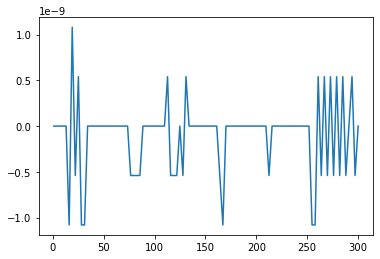

In [6]:
plt.plot(presses,V)

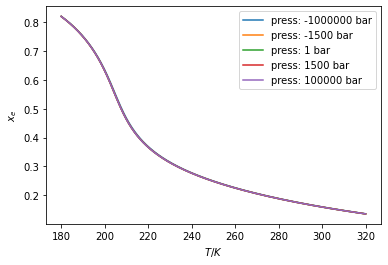

In [14]:

temps_x_test = np.linspace(180,320,1000)

for press in np.array([ -1000000,-1500,1,1500,100000]):
    xs_opt = bid.x(temps_x_test,np.array([press]))
    temps_x_test.shape
    plt.plot(temps_x_test,xs_opt,label=f'press: {press} bar')

plt.ylabel('$x_e$')
plt.xlabel('$T/K$')
plt.legend()

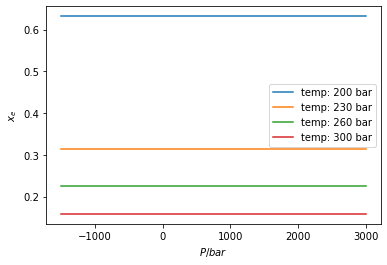

In [18]:

presses_x_test = np.linspace(-150,300,1000)*10 # *10 to convert to bar, from mpa    

for temp in np.array([200,230,260,300,]):
    xs_opt = bid.x(np.array([temp]),presses_x_test,)
    temps_x_test.shape
    plt.plot(presses_x_test,xs_opt.T,label=f'temp: {temp} bar')

plt.ylabel('$x_e$')
plt.xlabel('$P/bar$')
plt.legend()

[[0.82079588]]
[[0.63205676]]
[[0.1585599]]
[[0.1347101]]


/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: invalid value encountered in multiply
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: invalid value encountered in multiply
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: invalid value encountered in multiply
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: invalid value encounte

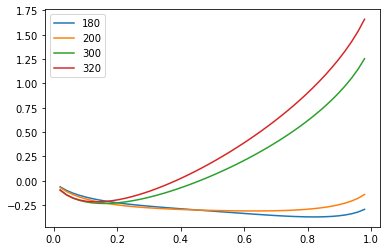

In [8]:
## Plotting the sub options


Tc = bid.Tc
Pc = bid.Pc

Ts = [180,200,300,320]
Ps = [-1500,1,1500]
x = np.linspace(0,1)
T = Ts[-1]
P = Ps[1]
for T in Ts:
    mix_E = bid.mixer.energy_free_x(T/Tc,P/Pc,x)

    plt.plot(x,mix_E.T,label=f'{T}')
    print(bid.mixer.x_equib(T/Tc,P/Pc))

legend()

In [9]:
min_func = lambda x: float(bid.mixer.energy_free_x(T/Tc,P/Pc,x))

In [10]:
opt.minimize_scalar(min_func,bounds=(0,1),method='bounded')

     fun: -0.21865099657174392
 message: 'Solution found.'
    nfev: 11
  status: 0
 success: True
       x: 0.1347100951601794

/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:62: RuntimeWarning: invalid value encountered in double_scalars
  B = (x*np.log(x) + (1-x)*np.log(1-x))


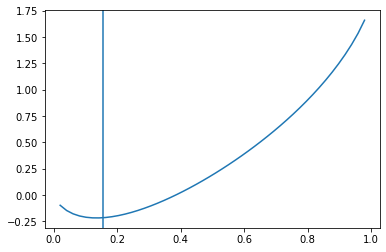

In [11]:
plt.plot(x,[min_func(xi) for xi in x])
plt.axvline(0.15637305536341858)

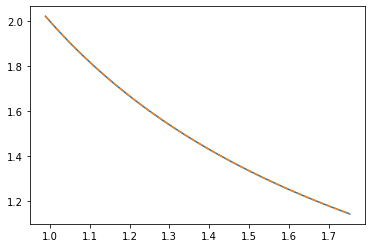

In [19]:
temps = np.arange(180,320)

temps_hat = bid.convert_T(temps)
presses_hat = bid.convert_P(np.array([-1500,1,1500]))

del_presses = presses_hat - bid.convert_P(bid.Pc)

omega_T = bid.mixer.omega_func(temps_hat,presses_hat[0])

omega_check = lambda T,delP: (2+0.03*delP)/T 

plot(temps_hat,omega_T)

plot(temps_hat,omega_check(temps_hat,del_presses[0]),ls='--')

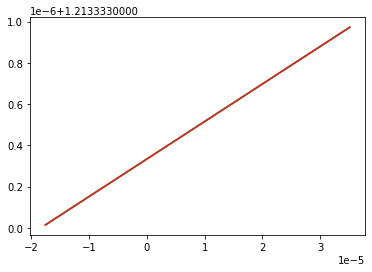

In [24]:
temps = np.array([200,230,260,300])   #np.arange(180,320)
presses = np.linspace(-1500,3000)
temps_hat = bid.convert_T(temps)
presses_hat = bid.convert_P(presses)

del_presses = presses_hat - bid.convert_P(bid.Pc)
for temp in temps:
    omega_T = bid.mixer.omega_func(temps_hat[-1],presses_hat)
    omega_check = lambda T,delP: (2+0.03*delP)/T 

    plot(presses_hat,omega_T.T,label=f'{temp}')

    #plot(presses_hat,omega_check(temp,del_presses),ls='--',label=f'{temp}')